In [ ]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 93 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=421f9fe01e0796b6375a342152a8c8c286a0cd0302d8d1930319b591bc5f5e84
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# raw data 바꿔가면서 분석
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/데이터.csv', index_col = 0, encoding = 'cp949')
raw_data = raw_data.drop("REFYM", axis = 1)

# 분석에 이용할 컬럼 바꾸고 싶으면 meaning list 수정
meaning_list_app = raw_data.columns.tolist()[48:]
raw_data["유동인구"] = raw_data["승차인원"]+raw_data["하차인원"]

meaning_list = ['유동인구','FAR', 'RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT','단독주택','공동주택','제1종근린생활시설','제2종근린생활시설','업무시설','의료시설','노유자시설','종교시설','교육연구시설','자동차관련시설','창고시설','문화및집회시설','공장','위험물저장및처리시설','동.식물관련시설','판매시설','숙박시설','운동시설','분뇨.쓰레기처리시설','자원순환관련시설','근린생활시설','방송통신시설','교육연구및복지시설','운수시설','판매및영업시설','위락시설','교정및군사시설','수련시설',
 '장례시설','발전시설','공공용시설','관광휴게시설','야영장시설','묘지관련시설','다세대주택']
data= raw_data.loc[:, meaning_list]
data = data.dropna(axis=0)




#클러스터링 포함
cl_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/클러스터데이터1.csv', index_col = 0, encoding = 'cp949')
data = data.loc[cl_data.index.tolist()]

In [ ]:
data.shape

(93, 42)

In [ ]:
cl_data.shape

(93, 7)

In [ ]:
data.head()

유동인구        FAR  RESDT_AREA_RT  COMRC_AREA_RT  MIXBLDG_AREA_RT  \
가평역    173530.0   1.946999          0.363          0.096            0.004   
강매역    314044.0  11.154428          0.493          0.001            0.003   
개화역    221664.0   0.668955          0.113          0.003            0.002   
검암역    715334.0   6.856013          0.244          0.071            0.009   
경기광주역  795054.0   6.668736          0.463          0.066            0.006   

       INDST_AREA_RT  ETC_AREA_RT   단독주택   공동주택  제1종근린생활시설  ...  위락시설  \
가평역            0.000        0.536   77.0   20.0       18.0  ...   0.0   
강매역            0.019        0.484   52.0  172.0       34.0  ...   0.0   
개화역            0.000        0.881  226.0    4.0       22.0  ...   0.0   
검암역            0.178        0.497   71.0  140.0       41.0  ...   0.0   
경기광주역          0.006        0.459  163.0  108.0       33.0  ...   0.0   

       교정및군사시설  수련시설  장례시설  발전시설  공공용시설  관광휴게시설  야영장시설  묘지관련시설  다세대주택  
가평역        0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  
강매역        0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  
개화역        0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  
검암역        0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  
경기광주역      0.0   0.0   0.0   0.0    0.0     0.0    0.0     0.0    0.0  

[5 rows x 42 columns]

In [ ]:
data.describe()

유동인구        FAR  RESDT_AREA_RT  COMRC_AREA_RT  MIXBLDG_AREA_RT  \
count  9.300000e+01  93.000000      93.000000      93.000000        93.000000   
mean   5.510136e+05   8.338826       0.239839       0.054419         0.018355   
std    6.060973e+05   7.935915       0.147383       0.063007         0.022730   
min    8.852000e+03   0.193355       0.000000       0.000000         0.000000   
25%    1.778600e+05   1.767966       0.107000       0.014000         0.004000   
50%    3.335600e+05   5.976306       0.240000       0.033000         0.009000   
75%    7.442260e+05  11.426412       0.352000       0.071000         0.026000   
max    3.411874e+06  34.899725       0.578000       0.354000         0.128000   

       INDST_AREA_RT  ETC_AREA_RT         단독주택        공동주택   제1종근린생활시설  ...  \
count      93.000000    93.000000    93.000000   93.000000   93.000000  ...   
mean        0.028226     0.659183   210.967742  118.129032   53.064516  ...   
std         0.054573     0.183434   312.221161  139.529039   74.856792  ...   
min         0.000000     0.252000     0.000000    0.000000    0.000000  ...   
25%         0.000000     0.518000    55.000000   19.000000   10.000000  ...   
50%         0.000000     0.671000   117.000000   76.000000   29.000000  ...   
75%         0.027000     0.828000   238.000000  163.000000   56.000000  ...   
max         0.232000     0.990000  2213.000000  705.000000  409.000000  ...   

            위락시설     교정및군사시설       수련시설       장례시설       발전시설      공공용시설  \
count  93.000000   93.000000  93.000000  93.000000  93.000000  93.000000   
mean    0.935484    5.612903   0.032258   0.010753   0.150538   0.021505   
std     5.003926   52.257937   0.311086   0.103695   1.020936   0.207390   
min     0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   
max    45.000000  504.000000   3.000000   1.000000   9.000000   2.000000   

           관광휴게시설      야영장시설     묘지관련시설      다세대주택  
count   93.000000  93.000000  93.000000  93.000000  
mean     3.354839   0.032258   0.053763   0.032258  
std     21.441855   0.230859   0.270490   0.230859  
min      0.000000   0.000000   0.000000   0.000000  
25%      0.000000   0.000000   0.000000   0.000000  
50%      0.000000   0.000000   0.000000   0.000000  
75%      0.000000   0.000000   0.000000   0.000000  
max    191.000000   2.000000   2.000000   2.000000  

[8 rows x 42 columns]

In [ ]:
lst = data.describe().loc['max']
col_list = lst[lst.values>100].index.tolist()
col_list = col_list + ['FAR','RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT']
col_list

['유동인구',
 '단독주택',
 '공동주택',
 '제1종근린생활시설',
 '제2종근린생활시설',
 '업무시설',
 '교육연구시설',
 '공장',
 '동.식물관련시설',
 '판매시설',
 '교정및군사시설',
 '관광휴게시설',
 'FAR',
 'RESDT_AREA_RT',
 'COMRC_AREA_RT',
 'MIXBLDG_AREA_RT',
 'INDST_AREA_RT',
 'ETC_AREA_RT']

In [ ]:
data= data.loc[:, col_list]
data = data.dropna(axis=0)
data

유동인구   단독주택   공동주택  제1종근린생활시설  제2종근린생활시설  업무시설  교육연구시설    공장  \
가평역    173530.0   77.0   20.0       18.0       51.0   0.0    42.0   3.0   
강매역    314044.0   52.0  172.0       34.0       11.0   0.0     9.0   3.0   
개화역    221664.0  226.0    4.0       22.0        4.0   0.0     0.0   0.0   
검암역    715334.0   71.0  140.0       41.0       43.0   0.0     5.0   0.0   
경기광주역  795054.0  163.0  108.0       33.0       29.0   0.0   142.0   0.0   
...         ...    ...    ...        ...        ...   ...     ...   ...   
초지역    507050.0    2.0   68.0        6.0        5.0   1.0    47.0   0.0   
파주역    121484.0  108.0    8.0       16.0       25.0   0.0     0.0  40.0   
팔당역    104632.0   77.0    2.0       10.0       42.0   0.0     1.0   0.0   
행신역    843118.0  105.0   49.0       25.0       23.0   9.0     6.0   0.0   
화전역    190018.0  310.0    3.0       99.0       50.0   0.0   281.0   4.0   

       동.식물관련시설  판매시설  교정및군사시설  관광휴게시설        FAR  RESDT_AREA_RT  \
가평역        11.0   0.0      0.0     0.0   1.946999          0.363   
강매역         4.0   3.0      0.0     0.0  11.154428          0.493   
개화역         2.0   0.0      0.0     0.0   0.668955          0.113   
검암역         2.0   0.0      0.0     0.0   6.856013          0.244   
경기광주역       7.0   0.0      0.0     0.0   6.668736          0.463   
...         ...   ...      ...     ...        ...            ...   
초지역         0.0  12.0      0.0    24.0  10.652266          0.578   
파주역        13.0   0.0      0.0     0.0   0.706572          0.107   
팔당역        53.0   1.0      0.0     0.0   0.596948          0.092   
행신역         0.0   2.0      0.0     0.0   9.580349          0.201   
화전역         3.0   3.0    504.0     0.0  34.899725          0.292   

       COMRC_AREA_RT  MIXBLDG_AREA_RT  INDST_AREA_RT  ETC_AREA_RT  
가평역            0.096            0.004          0.000        0.536  
강매역            0.001            0.003          0.019        0.484  
개화역            0.003            0.002          0.000        0.881  
검암역            0.071            0.009          0.178        0.497  
경기광주역          0.066            0.006          0.006        0.459  
...              ...              ...            ...          ...  
초지역            0.017            0.000          0.000        0.405  
파주역            0.039            0.010          0.172        0.671  
팔당역            0.006            0.006          0.000        0.897  
행신역            0.060            0.016          0.000        0.723  
화전역            0.029            0.012          0.000        0.667  

[93 rows x 18 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled2 = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
scaled2.mean(axis=0)

유동인구              -5.849562e-17
단독주택               1.730993e-17
공동주택               5.491426e-17
제1종근린생활시설          3.581365e-17
제2종근린생활시설          6.834437e-17
업무시설              -4.834842e-17
교육연구시설            -3.820122e-17
공장                 1.107239e-16
동.식물관련시설           5.043755e-17
판매시설               3.238150e-17
교정및군사시설            1.337043e-16
관광휴게시설            -1.193788e-17
FAR                2.578583e-16
RESDT_AREA_RT     -1.778744e-16
COMRC_AREA_RT      6.804593e-17
MIXBLDG_AREA_RT   -7.162729e-18
INDST_AREA_RT     -1.551925e-16
ETC_AREA_RT        2.480095e-16
dtype: float64

In [ ]:
scaled = scaled2.drop(['유동인구'], axis=1)


In [ ]:
pca = PCA(random_state=312)
X_p = pca.fit_transform(scaled)

In [ ]:
fa = FactorAnalyzer(n_factors=scaled.shape[1], rotation=None)
fa.fit(scaled)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [4.81395577e+00 2.14893360e+00 1.80097897e+00 1.56188420e+00
 1.36142856e+00 1.05535166e+00 9.54311547e-01 7.92035201e-01
 6.39884294e-01 5.61432041e-01 4.26978591e-01 2.76467659e-01
 2.27520913e-01 1.94308007e-01 1.08671420e-01 7.58527495e-02
 4.82565878e-06] 

적합한 PC 개수: 6


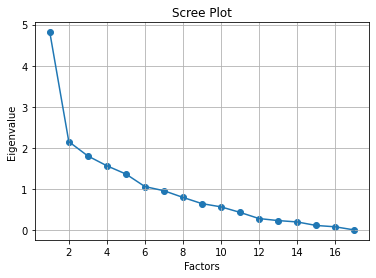

In [ ]:
#Scatter plot
plt.scatter(range(1, scaled.shape[1]+1),ev)
plt.plot(range(1,scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio)

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum)

분산 설명 비율:
 [2.83173869e-01 1.26407859e-01 1.05939939e-01 9.18755412e-02
 8.00840332e-02 6.20795093e-02 5.61359733e-02 4.65903060e-02
 3.76402526e-02 3.30254142e-02 2.51163877e-02 1.62628035e-02
 1.33835831e-02 1.14298828e-02 6.39243649e-03 4.46192644e-03
 2.83862281e-07]
누적 분산 설명 비율:
 [0.28317387 0.40958173 0.51552167 0.60739721 0.68748124 0.74956075
 0.80569672 0.85228703 0.88992728 0.9229527  0.94806908 0.96433189
 0.97771547 0.98914535 0.99553779 0.99999972 1.        ]


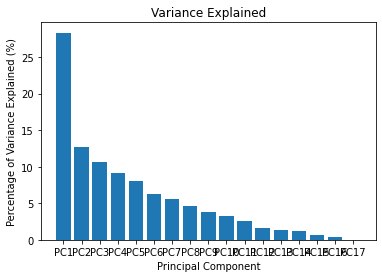

In [ ]:
# 누적 분산비율 그래프
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [ ]:
t = 6 #pc 개수 조정
pca = PCA(n_components=t,random_state=312)
x_p = pca.fit_transform(scaled)

In [ ]:
pc_list = []
for i in range(0,t):
  pc_list.append(f"PC{i+1}")

pd.DataFrame(pca.components_.T, 
             columns = pc_list, 
             index=scaled.columns)

PC1       PC2       PC3       PC4       PC5       PC6
단독주택             0.263073 -0.110950 -0.313514 -0.263202 -0.256622 -0.156729
공동주택             0.279034  0.036171 -0.149218 -0.279978  0.263112 -0.397688
제1종근린생활시설        0.346146 -0.208293 -0.114998  0.088933 -0.249060  0.098917
제2종근린생활시설        0.346805 -0.285302 -0.038344  0.144907 -0.227144  0.177968
업무시설             0.257558 -0.128940  0.239618  0.311254  0.209715  0.001220
교육연구시설           0.120563  0.536402 -0.136182  0.264504 -0.195207  0.033045
공장              -0.045520  0.001911  0.424157 -0.101223 -0.434086 -0.443205
동.식물관련시설        -0.105670 -0.111333 -0.072170  0.144298 -0.104879  0.042520
판매시설             0.117994 -0.028078  0.330804  0.238743  0.320249 -0.263976
교정및군사시설          0.055443  0.425790 -0.194851  0.422082 -0.307020 -0.178357
관광휴게시설           0.020394  0.301141  0.161482 -0.197252 -0.055939  0.609484
FAR              0.371178  0.236346  0.035676  0.117414  0.117897 -0.176612
RESDT_AREA_RT    0.293906  0.295286 -0.013403 -0.297144  0.248790  0.064566
COMRC_AREA_RT    0.287003 -0.223778  0.263022  0.311978 -0.008194  0.228708
MIXBLDG_AREA_RT  0.251187 -0.197676 -0.180406 -0.188786 -0.245234  0.006558
INDST_AREA_RT   -0.010106  0.107596  0.529935 -0.251726 -0.360959 -0.035134
ETC_AREA_RT     -0.362765 -0.168205 -0.214903  0.230312 -0.059417 -0.120747

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28317387, 0.40958173, 0.51552167, 0.60739721, 0.68748124,
       0.74956075])

In [ ]:
pc_list = []
for i in range(0,t):
  app = f"PC{i+1}"
  pc_list.append(app)
print(pc_list)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [ ]:
x_pp = pd.DataFrame(x_p, 
                    columns = pc_list, 
                    index = scaled.index)
x_pp

PC1       PC2       PC3       PC4       PC5       PC6
가평역   -0.319923  0.562379  0.059618  0.254100  0.420229  0.828602
강매역    0.076947  1.284467 -0.031943 -1.117367  1.323244 -0.224433
개화역   -2.276637 -0.355264 -0.675918  0.185652  0.215496  0.003857
검암역   -0.125202  0.416187  1.696729 -1.005963 -0.468791  0.149251
경기광주역  0.674196  2.597752 -0.509309  0.243861  0.293051  0.489494
...         ...       ...       ...       ...       ...       ...
초지역    0.211087  2.435413  0.248460 -0.903082  1.468561  0.927287
파주역   -1.748996 -0.117788  1.987014 -0.689165 -1.544571 -0.310428
팔당역   -2.460252 -0.766276 -0.706874  0.736839 -0.065675  0.258729
행신역   -0.653316 -0.118556 -0.137625  0.391744  0.602422  0.146689
화전역    2.494703  8.761148 -3.336736  6.345537 -4.018588 -1.792870

[93 rows x 6 columns]

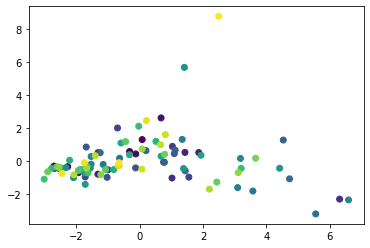

In [ ]:
# 2차원 plot
plt.scatter(x=x_pp['PC1'],y=x_pp['PC2'], c = range(0,len(x_pp.index.tolist())))

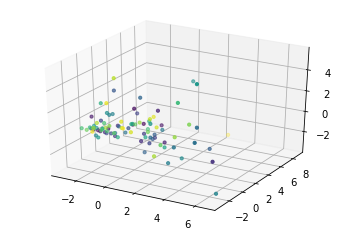

In [ ]:
# 3차원 plot
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(x_pp['PC1'],x_pp['PC2'],x_pp['PC3'], s=10, c = range(0,len(x_pp.index.tolist())))
plt.show()

In [ ]:
x_pp.describe()

PC1           PC2           PC3           PC4           PC5  \
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean   1.050534e-16 -1.910061e-17 -3.342607e-17  9.550306e-18 -9.550306e-18   
std    2.205965e+00  1.473870e+00  1.349279e+00  1.256527e+00  1.173127e+00   
min   -3.019151e+00 -3.220138e+00 -3.445900e+00 -2.592873e+00 -4.091046e+00   
25%   -1.690599e+00 -6.671514e-01 -6.257077e-01 -6.708120e-01 -5.844321e-01   
50%   -5.933602e-01 -3.514517e-01 -2.881652e-01 -2.151369e-02  6.845199e-02   
75%    1.119958e+00  4.900766e-01  3.377011e-01  4.458553e-01  4.812486e-01   
max    6.596593e+00  8.761148e+00  5.454163e+00  6.345537e+00  4.324032e+00   

             PC6  
count  93.000000  
mean    0.000000  
std     1.032871  
min    -3.534723  
25%    -0.245411  
50%     0.045658  
75%     0.323702  
max     5.581487

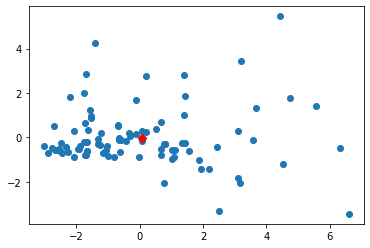

In [ ]:
# Principal Component Pattern Plot 1
plt.scatter(x=x_pp['PC1'],y=x_pp['PC3'])
plt.scatter(x=x_pp.iloc[1,0], y=x_pp.iloc[1,2], marker='D', c='r')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
train_dataset, test_dataset = train_test_split(scaled2, train_size=0.7, test_size=0.3, random_state=312)
train_y = train_dataset[['유동인구']]
test_y = test_dataset[['유동인구']]
train = train_dataset.drop(['유동인구'], axis=1)
test = test_dataset.drop(['유동인구'], axis=1)

In [ ]:
#scale_train = pd.DataFrame(StandardScaler().fit_transform(train), columns=train.columns, index = train.index)
#scale_test = pd.DataFrame(StandardScaler().fit_transform(test), columns=test.columns, index = test.index)

pca = PCA(n_components = t)
pdComp1 = pca.fit_transform(train)
pdComp2 = pca.fit_transform(test)
train_p = pd.DataFrame(data = pdComp1, columns = pc_list)
test_p = pd.DataFrame(data = pdComp2, columns = pc_list)

In [ ]:
#scale the training and testing data
X_nopca_train = scale(train)
X_nopca_test = scale(test)

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_nopca_train[:,:], train_y)

#calculate RMSE
pred1 = regr.predict(X_nopca_test)
np.sqrt(mean_squared_error(test_y, pred1))


1.918264278256667

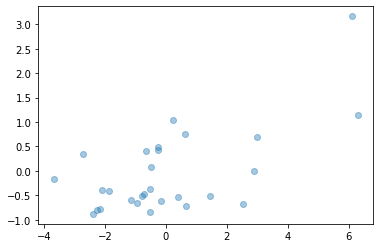

R2 =  -4.016821213261516


In [ ]:
plt.scatter(pred1, test_y, alpha = 0.4)
plt.show()

r2 = r2_score(y_true = test_y, y_pred = pred1)
print('R2 = ', r2)

In [ ]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(train))
X_reduced_test = pca.transform(scale(test))[:,:]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:], train_y)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(test_y, pred))


0.7049822667291872

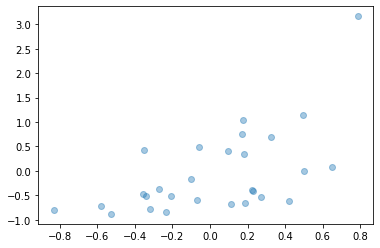

R2 =  0.3224082169651622


In [ ]:
plt.scatter(pred, test_y, alpha = 0.4)
plt.show()

r2 = r2_score(y_true = test_y, y_pred = pred)
print('R2 = ', r2)

In [ ]:
regr.coef_

array([[ 0.18857599, -0.04728123, -0.0381756 , -0.02263956, -0.11281816,
        -0.0191879 ]])

In [ ]:
regr.intercept_

array([0.02058088])

In [ ]:
train_y_prime = train_y.reset_index()
merge_df = pd.concat([train_p, train_y_prime], axis = 1)
merge_df = merge_df.set_index('index')
print(merge_df)

               PC1       PC2       PC3       PC4       PC5       PC6      유동인구
index                                                                         
지축역      -2.022681 -0.367833  0.180869 -0.995253 -0.244231  0.728100 -0.145951
동작(현충원)역 -0.933371  0.073790 -0.042500  0.023230 -0.922924 -0.855831 -0.359832
신목동역      0.887206  0.062176  0.491503  0.925622 -1.443908 -1.647012 -0.255086
구성역       1.611375 -0.191229  1.367428  1.087610  0.127522 -0.791719  0.000946
진위역      -1.425791  0.736373  3.643274  1.127103  6.291872 -2.242699 -0.639795
...            ...       ...       ...       ...       ...       ...       ...
팔당역      -2.290817 -0.227208 -0.602439 -0.584234 -0.099308  0.853844 -0.740477
개화역      -2.128857 -0.103368 -0.527802 -0.299448 -0.251080  0.250106 -0.546339
천마산역     -0.499767 -0.449950 -0.120478  0.238237 -0.116851 -0.086538 -0.626561
달월역      -1.691875 -0.499339  0.452214 -1.081481 -0.227681  0.936428 -0.899361
마석역       1.475745 -0.622166 -0.566974  0.034732  0.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ols('유동인구 ~ PC1', data=merge_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   유동인구   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     12.66
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           0.000715
Time:                        06:35:21   Log-Likelihood:                -89.770
No. Observations:                  65   AIC:                             183.5
Df Residuals:                      63   BIC:                             187.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0206      0.121      0.170      0.866      -0.222       0.263
PC1            0.1909      0.054      3.558      0.001       0.084       0.298
==============================================================================
Omnibus:                       58.374   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.138
Skew:                           2.677   Prob(JB):                     2.00e-62
Kurtosis:                      11.731   Cond. No.                         2.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model = ols('유동인구 ~ PC1', data=merge_df).fit()
sm.stats.anova_lm(model, typ=1)

df     sum_sq    mean_sq          F    PR(>F)
PC1        1.0  12.111945  12.111945  12.662845  0.000715
Residual  63.0  60.259170   0.956495        NaN       NaN

In [ ]:
print('{:.20f}'.format(sm.stats.anova_lm(model, typ=1)['PR(>F)'][0]))

0.00071540417742665680


In [ ]:
model = ols('유동인구 ~ PC1+PC2+PC3+PC4+PC5+PC6', data=merge_df).fit()
sm.stats.anova_lm(model, typ=1)

df     sum_sq    mean_sq          F    PR(>F)
PC1        1.0  12.111945  12.111945  12.091139  0.000967
PC2        1.0   1.282427   1.282427   1.280224  0.262514
PC3        1.0   0.028762   0.028762   0.028713  0.866034
PC4        1.0   0.000066   0.000066   0.000066  0.993547
PC5        1.0   0.465127   0.465127   0.464328  0.498320
PC6        1.0   0.382984   0.382984   0.382327  0.538781
Residual  58.0  58.099803   1.001721        NaN       NaN

In [ ]:
variables = sm.stats.anova_lm(model, typ=1).index.tolist()
pvalues = sm.stats.anova_lm(model, typ=1)['PR(>F)'].tolist()

for variable, pvalue in zip(variables, pvalues):
    
    print(variable, '\t', '{:.20f}'.format(pvalue))

PC1 	 0.00096699269474708046
PC2 	 0.26251403908403631027
PC3 	 0.86603398382762775132
PC4 	 0.99354713098080293943
PC5 	 0.49831985475248763429
PC6 	 0.53878142647429383416
Residual 	 nan
